In [1]:
from pygom import SimulateOde, Transition as T

In [3]:
state = ['S_v', 'S_h', 'I_v', 'I_h']

In [4]:
param = ['beta_v', 'beta_h', 'mu_v', 'mu_h',
'lambda_v', 'lambda_h', 'gamma']

In [5]:
t1 = T('S_h', 'lambda_h-mu_h*S_h-beta_h*S_h*I_v+gamma*I_h')

In [6]:
t2 = T('S_v', 'lambda_v-mu_v*S_v-beta_v*S_v*I_h')

In [7]:
t3 = T('I_h', 'beta_h*S_h*I_v-(mu_h+gamma)*I_h')

In [8]:
t4 = T('I_v', 'beta_v*S_v*I_h-mu_v*I_v')

In [9]:
ode = SimulateOde(state, param, ode=[t1,t2,t3,t4])

In [10]:
from pygom.model.epi_analysis import R0

In [11]:
ode = ode.get_unrolled_obj()

/usr/local/lib/python3.7/site-packages/sympy/__init__.py:676: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  deprecated_since_version="1.6").warn()


In [12]:
R0(ode, ['I_v','I_h'])

sqrt(beta_h*beta_v*lambda_h*lambda_v/(mu_h*mu_v**2*(gamma + mu_h)))

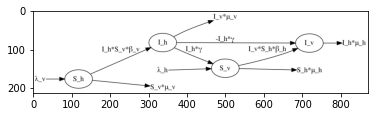

In [13]:
ode.get_transition_graph()